<a href="https://colab.research.google.com/github/beulah-s/DS_Bootcamp_2023/blob/main/Lab10_samuel_beulah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import needed libraries
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
# More libraries for visualizing DecisionTree
# Visualize the tree
from sklearn.tree import export_graphviz

# used to run program from a python code
from subprocess import check_call

# read image
from PIL import Image

In [3]:
# Get data using URL
url = 'https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv'
divorce_df = pd.read_csv(url)
divorce_df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
divorce_df.shape

(170, 55)

In [5]:
# Get the features and target variable
x = divorce_df.drop(['Class'], axis=1)
y = divorce_df['Class']

print(x.shape)
print(y.shape)

(170, 54)
(170,)


In [6]:
# Perform Train Test Split on the data. 20% used for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)
print(x_train.shape)
print(x_test.shape)

(136, 54)
(34, 54)


In [7]:
# Fit model with DecisionTreeClassifier and calculate accuracy score
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_preds = clf.predict(x_test)
clf_score = accuracy_score (y_test, clf_preds)
clf_score

0.9705882352941176

In [8]:
# Export decision tree
export_graphviz(clf,out_file='tree.dot', feature_names = x.columns, max_depth=5, class_names =['Potential divorce','Healthy Marriage'])

In [9]:
# Convert .dot file to .png file
check_call(['dot','-Tpng', 'tree.dot', '-o', 'tree.png'])


0

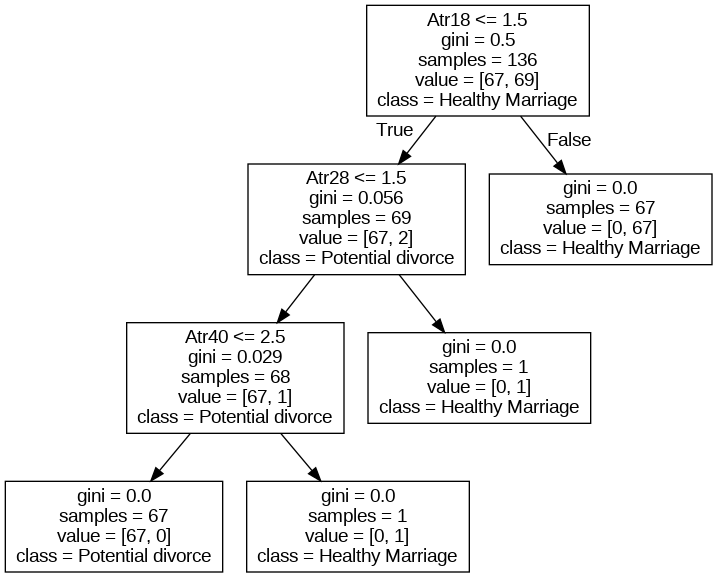

In [10]:
# View image
image = Image.open('tree.png')
image

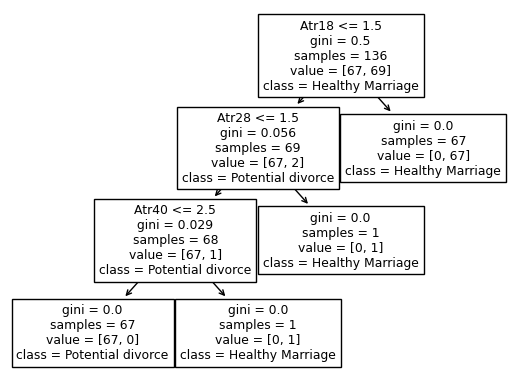

In [11]:
# Can also use this function
from sklearn.tree import plot_tree

plot_tree(clf,feature_names = x.columns, max_depth=10, class_names = ['Potential divorce', 'Healthy Marriage'])
plt.show()

In [12]:
# Tree chart with max_depth ranging from 1 - 20
depth_values = list(range(1,21))

In [13]:
depth_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

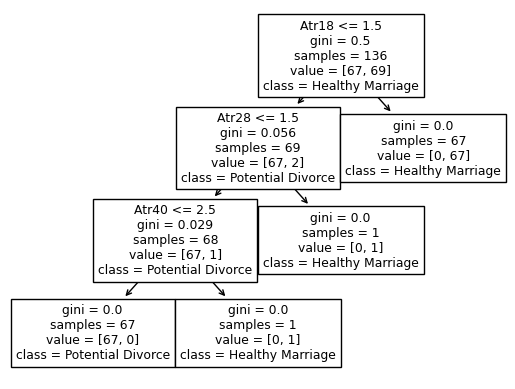

In [16]:
for i in depth_values:
    plot_tree(clf,feature_names = x.columns, max_depth=i, class_names=['Potential Divorce', 'Healthy Marriage'])
    plt.savefig('tree_depth'+str(i)+'.png')